# **HANDS ON 2**
Nama : M. Arief Rahman Hakim \
NIM  : 122140083

# **Instruksi Hands On 2** 

## Instruksi 1

1. Kamu adalah seorang intern pada sebuah perusahaan teknologi kesehatan. Perusahaan tersebut sedang mengembangkan teknologi wearable untuk mendeteksi detak jantung berdasarkan sinyal PPG (Photoplethysmography) yakni sinyal aliran darah dari jantung ke tangan. Kamu akan mensimulasikan sinyal PPG menggunakan library `neurokit2.ppg_simulate` (Ref.) dengan parameter sebagai berikut

    Durasi: `Berdasarkan 3 digit terakhir nim anda`\
    Sampling Rate: `150 Hz`\
    Noise Level: `0.<2 digit nim terakhir>`\
    Heart Rate: `80 Beat Per Minute (BPM)`\
    Random State: `tanggal bulan tahun lahir anda` dengan format YYMMDD misalnya `240925`

    Karena NIM saya 122140083, maka:\
    Durasi: `83`\
    Sampling rate : `150`\
    Noise Level : `0.83`\
    Heart Rate : `88 BPM`\
    Random State : `160823`

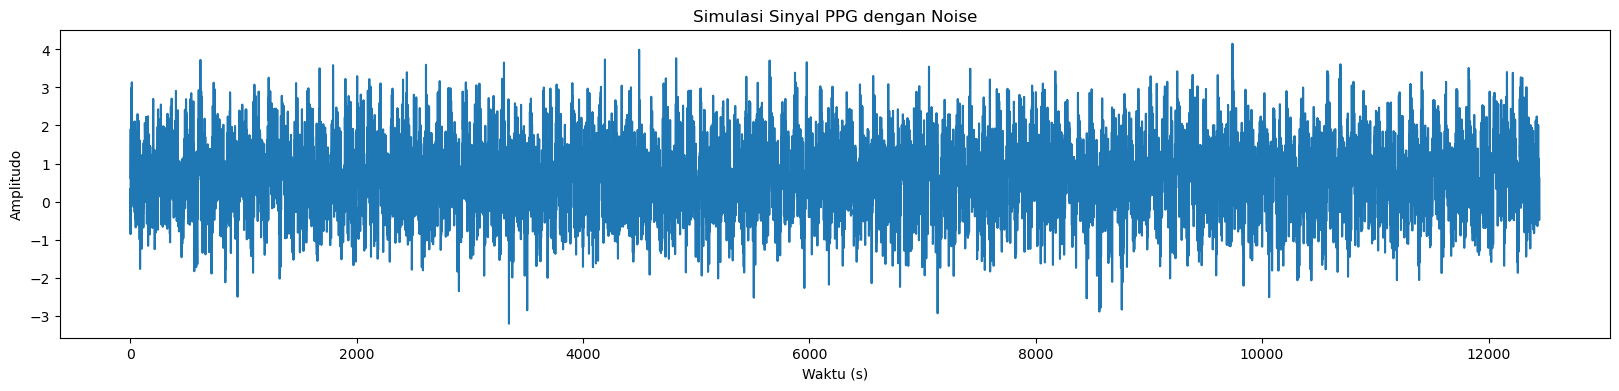

In [6]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

# Simulasi sinyal PPG
ppg_signal = nk.ppg_simulate(duration=83, sampling_rate=150, heart_rate=80, random_state=160823)

# Tambahkan noise secara manual
noise_level = 0.83
noise = np.random.normal(0, noise_level, len(ppg_signal))
ppg_signal_noisy = ppg_signal + noise

# Plot sinyal dengan noise
plt.figure(figsize=(20, 4))
plt.plot(ppg_signal_noisy)
plt.title("Simulasi Sinyal PPG dengan Noise")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.show()

- 1(a) Buktikanlah bahwa proses downsampling pada sinyal PPG akan menghilangkan informasi dari sinyal asi. Lakukan downsampling dari 150Hz ke 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz. Jelaskan apa yang terjadi dan buktikan bahwa semakin rendah sampling frequency (fs) maka sinyal akan semakin terdistorsi dan terdapat Aliasing pada sinyal hasil downsampling. Jelaskan apa itu Aliasing

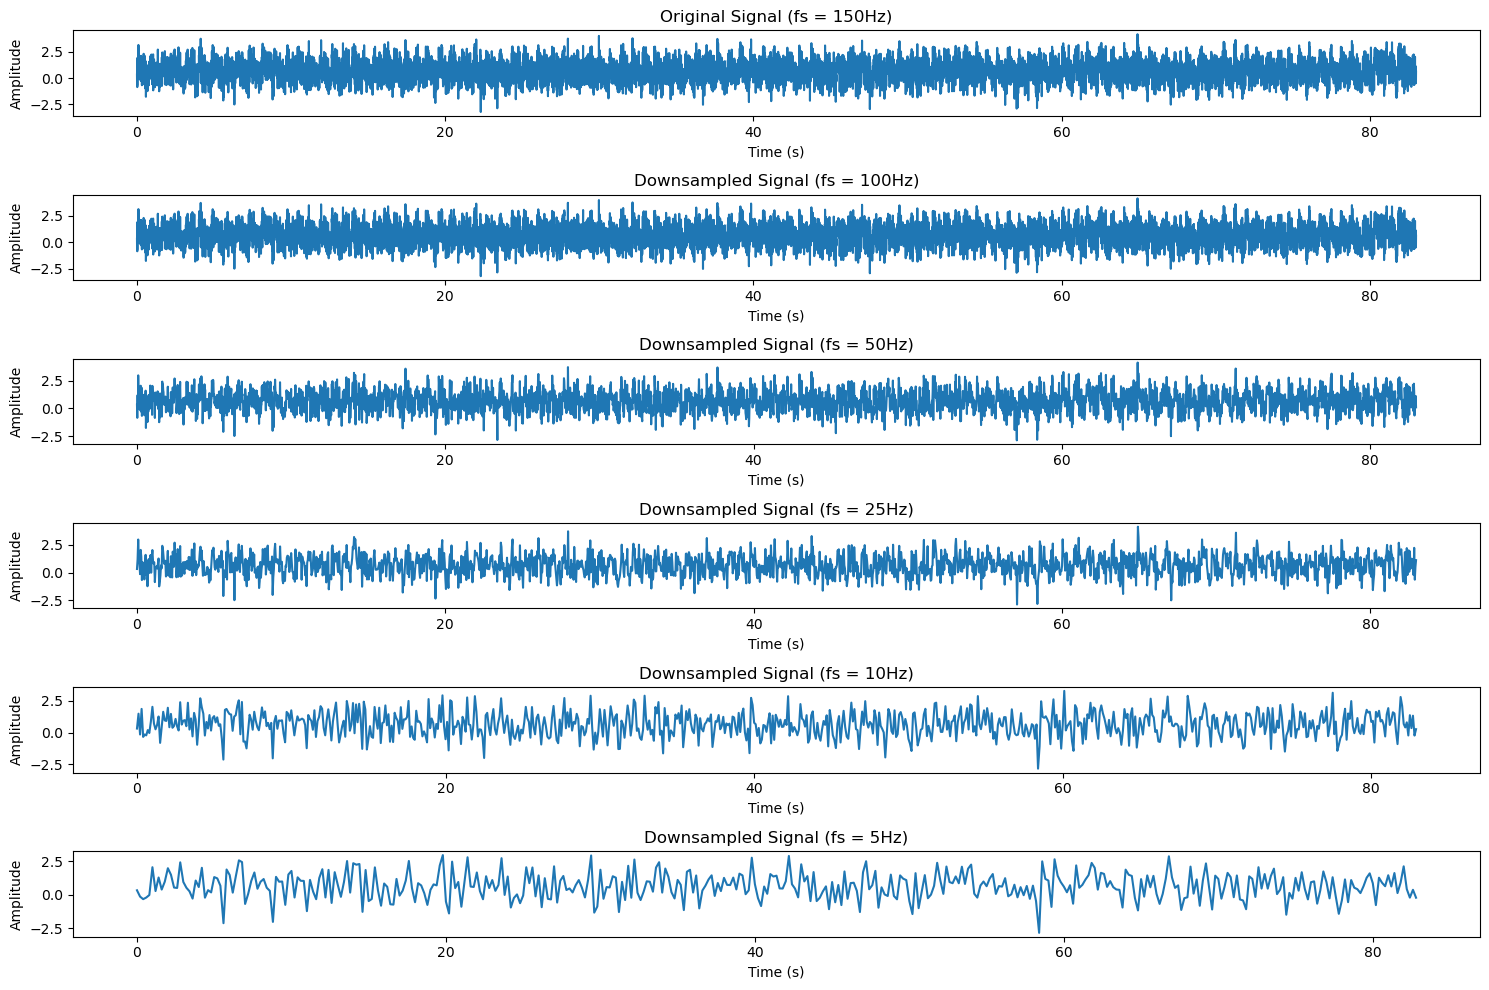

In [8]:
# Define the original sampling rate and time vector
original_fs = 150  # Original sampling frequency
time = np.arange(len(ppg_signal_noisy)) / original_fs

# Define target frequencies for downsampling
target_fs = [100, 50, 25, 10, 5]

# Create subplots
plt.figure(figsize=(15, 10))

# Plot original signal
plt.subplot(6, 1, 1)
plt.plot(time, ppg_signal_noisy)
plt.title(f'Original Signal (fs = {original_fs}Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Perform downsampling for each target frequency
for i, fs in enumerate(target_fs, 1):
    # Calculate downsampling factor
    factor = original_fs // fs
    
    # Downsample signal
    downsampled_signal = ppg_signal_noisy[::factor]
    downsampled_time = time[::factor]
    
    # Plot downsampled signal
    plt.subplot(6, 1, i+1)
    plt.plot(downsampled_time, downsampled_signal)
    plt.title(f'Downsampled Signal (fs = {fs}Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### Penjelasan Instruksi 1 : a
Pada kesempatan kali ini kita telah mensimulasikan downsamping yang dilakukan mulai dari 150hz sampai 5hz, Berikut adalah hasilnya:
| Sampling Rate | Hasil yang Terlihat           | Penjelasan                                                                 |
|---------------|-------------------------------|---------------------------------------------------------------------------|
| 150 Hz        | Sinyal sangat halus dan detail| Representasi sinyal paling akurat                                         |
| 100 Hz        | Masih cukup baik              | Hampir tidak ada informasi yang hilang                                   |
| 50 Hz         | Mulai terlihat kurang detail  | Beberapa puncak halus terlewatkan                                        |
| 25 Hz         | Distorsi tampak jelas         | Bentuk sinyal berubah, detak jantung sulit dibedakan                     |
| 10 Hz         | Sangat terdistorsi            | Informasi detak jantung hampir hilang, aliasing muncul                   |
| 5 Hz          | Tidak akurat                  | Sinyal berubah menjadi gelombang aneh → terjadi aliasing yang berat     |

Berdasarkan yang kita lihat dari hasil simulasi, semakin tinggi `sampling rate` maka semakin banyak informasi penting yang hilang karena sinyal akan semakin terdistorsi dan terdapat `Aliasing` pada sinyal hasil downsampling. 

Aliasing adalah suatu kejadian saat sinyal dengan frekuensi yang tinggi di-sampling dengan sampling rate yang terlalu rendah, sehingga sinyal tersebut tidak mampu mempresentasikan nilai/informasinya dengan baik.

Menurut Teorema Nyquist-Shannon:
- Agar sinyal bisa di-sampling dengan baik, maka `sampling rate ≥ 2 × frekuensi tertinggi sinyal`.
- Jika tidak memenuhi syarat tersebut. Maka akan terjadi Aliasing.
- Contoh: `fs` 5 hz akan terdistrosi karena tidak memenuhi `≥ 2 × frekuensi tertinggi sinyal`.

Berikut saya tambahkan referensi untuk melihatnya dalam keadaan bergerak, bagaimana sampling rate yang rendah menjadikan sinyal semakin tidak akurat:
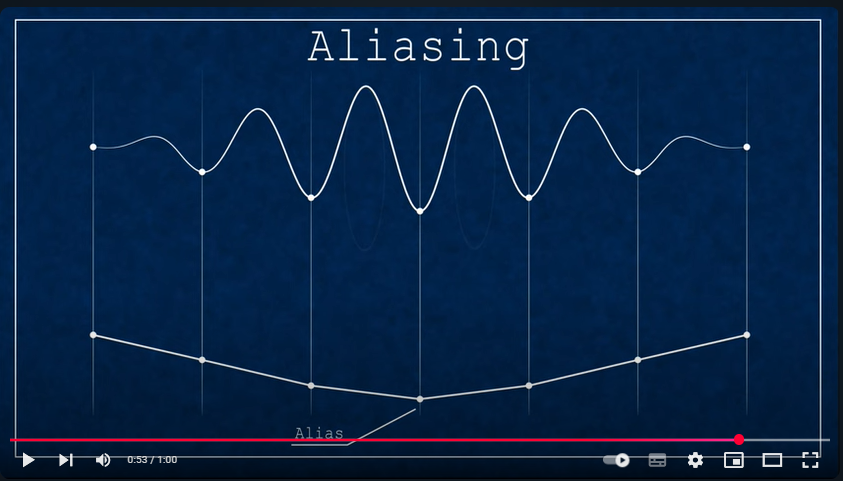\
sumber: https://www.youtube.com/watch?v=CTllCx5pHvM 

- 1(b) Ketika kamu melakukan filtering, terdapat parameter order saat kamu melakukan filtering. Apa maksudnya dari order dan apa yang akan terjadi jika kamu mengganti nilai order terhadap sinyal?

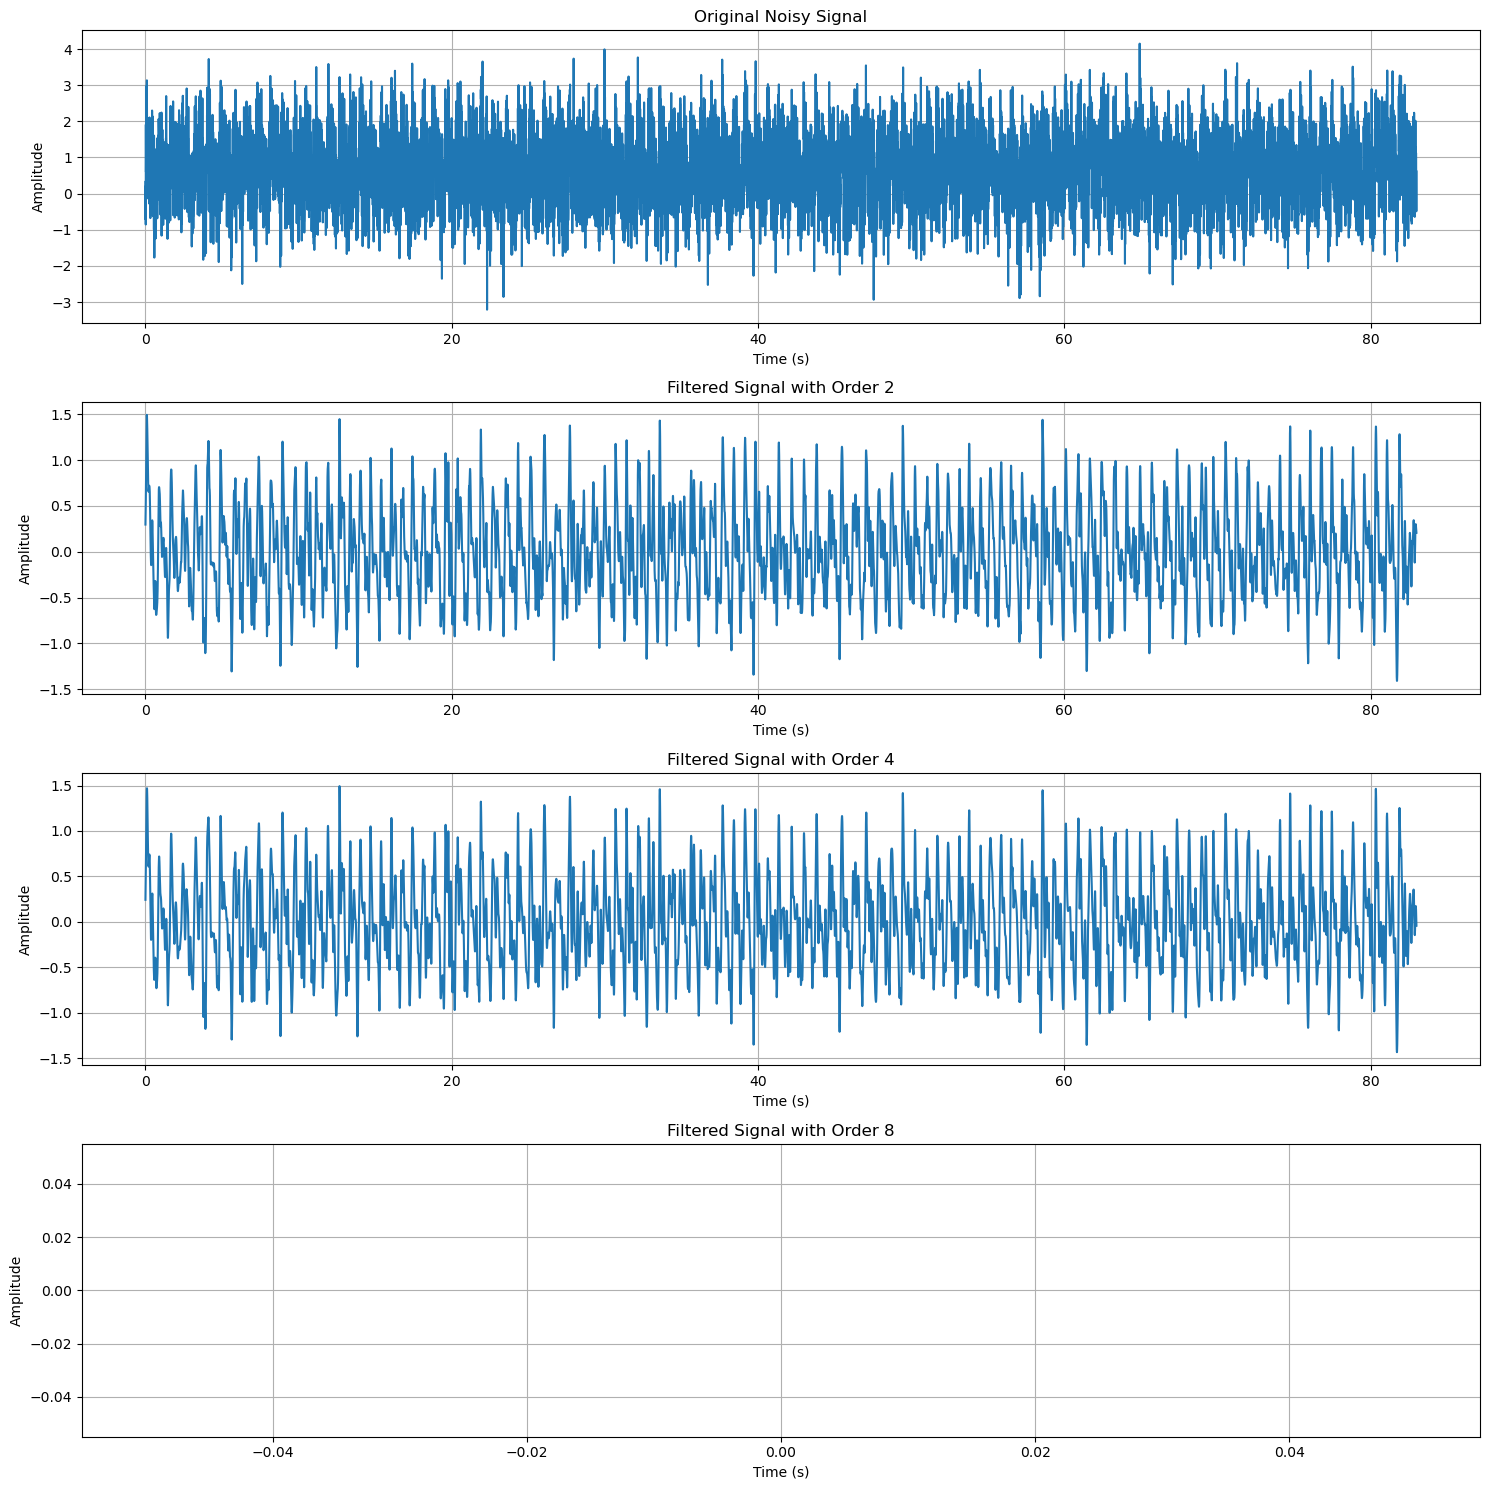

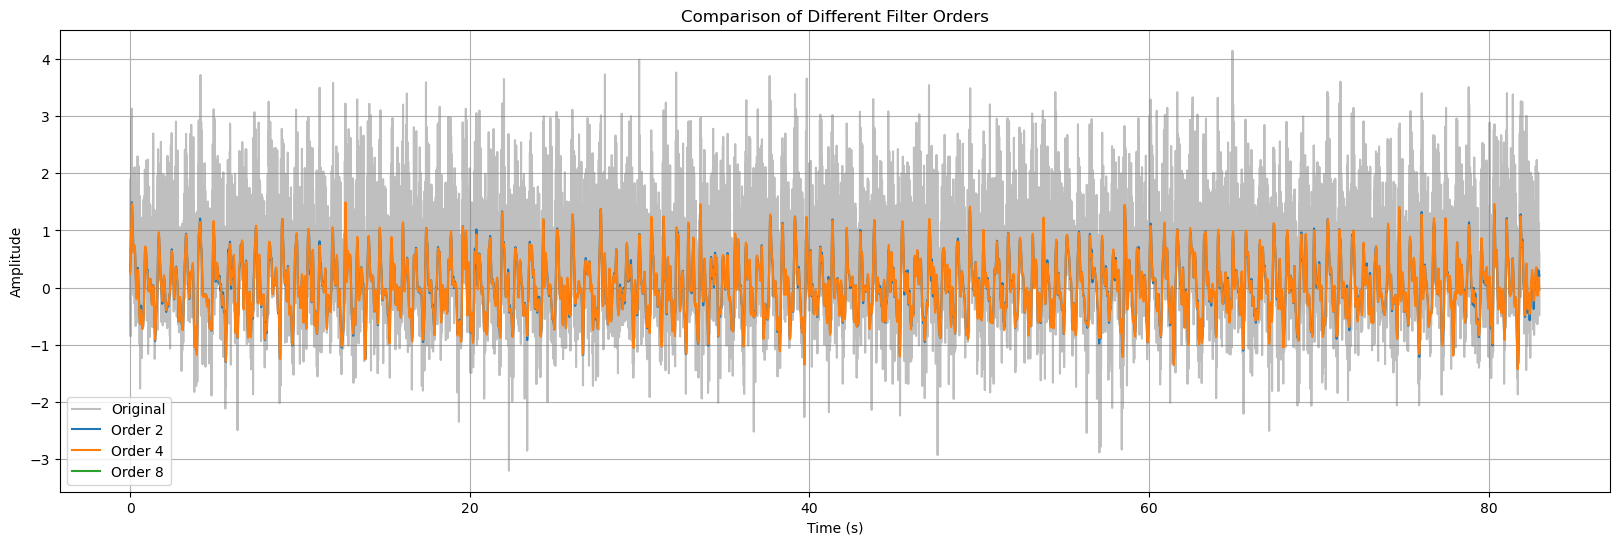

In [11]:
from scipy import signal

# Define filter parameters
low_freq = 0.5  # Hz
high_freq = 8.0  # Hz
orders = [2, 4, 8]  # Different filter orders to compare

# Create subplots for individual signals
plt.figure(figsize=(15, 15))

# Plot original noisy signal
plt.subplot(4, 1, 1)
plt.plot(time, ppg_signal_noisy)
plt.title('Original Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Apply filters and plot for each order
for i, order in enumerate(orders, 1):
    # Create Butterworth bandpass filter
    nyquist = original_fs / 2
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    
    # Apply filter
    filtered_signal = signal.filtfilt(b, a, ppg_signal_noisy)
    
    # Plot filtered signal
    plt.subplot(4, 1, i+1)
    plt.plot(time, filtered_signal)
    plt.title(f'Filtered Signal with Order {order}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot all signals overlaid
plt.figure(figsize=(20, 6))
plt.plot(time, ppg_signal_noisy, 'gray', alpha=0.5, label='Original')

for order in orders:
    nyquist = original_fs / 2
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_signal = signal.filtfilt(b, a, ppg_signal_noisy)
    plt.plot(time, filtered_signal, label=f'Order {order}')

plt.title('Comparison of Different Filter Orders')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### Penjelasan Instruksi 1 : b

Pada kesempatan ini kita akan melakukan filtering, namun kita akan fokus terhadap salah satu parameter dalam filtering yaitu `order`, Apa itu `Order`?

Parameter `order` dalam filtering tertuju pada tingkat kompleksitas dari sebuah filter, secara sederhana:
`Semakin tinggi order, maka semakin tajam transisinya`
Berikut lebih jelasnya Pengaruh order terhadap sinyal:
| Order Rendah                                       | Order Tinggi                                                      |
|----------------------------------------------------|--------------------------------------------------------------------|
| Transisi antara passband dan stopband lebih landai | Transisi lebih tajam                                              |
| Sedikit distorsi fase                              | Potensi distorsi fase tinggi (non-linear phase)                   |
| Tidak terlalu ‘bersih’ membuang noise tinggi       | Sangat bersih, tapi bisa overfitting noise                        |

Pada Simulasi yang kita coba diatas, bisa dilihat bahwa:
- Order 2 : Noise mengurang sedikit, sinyal tetap halus
- Order 4 : Noise mengurang sedikit dibandingkan order 2
- Order 8 : Nilai Terdistorsi karena order terlalu besar

Namun jika order lebih tinggi, bisa muncul ringing atau distorsi tepi sinyal.

Kesimpulan:
- Order membuat filter lembut dan stabil tapi kurang efektif membuang noise
- Order tinggi menghasilkan filter tajam, efektif menolak noise, tapi bisa menyebabkan distorsi bentuk sinyal (seperti overshoot, ringing, atau delay fase).



## Instruksi 2
2. Lakukan eksperimen dengan merancang filter band-pass menggunakan signal.butter. Pada sinyal respirasi (pernapasan). Generate sebuah signal dengan ketentuan:

    Durasi: `Berdasarkan 3 digit terakhir nim anda`\
    Sampling Rate: `100 Hz`\
    Noise level: `0.<2 digit nim terakhir>`\
    respiratory_rate: `18 Breaths Per Minute (BPM)`\
    random_state: `tanggal bulan tahun lahir anda` dengan format YYMMDD misalnya `240925`\
Anda dapat dengan bebas bereksperimen menentukan frekuensi cutoff yang diinginkan namun jelaskan latar belakang penentuan letak frekuensi cutoff mengapa anda memilih di nilai tersebut.

    Karena NIM saya 122140083, maka:\
    Durasi: `83`\
    Sampling rate : `100`\
    Noise Level : `0.83`\
    Respiratory_rate = `18`\
    Random State : `160823`

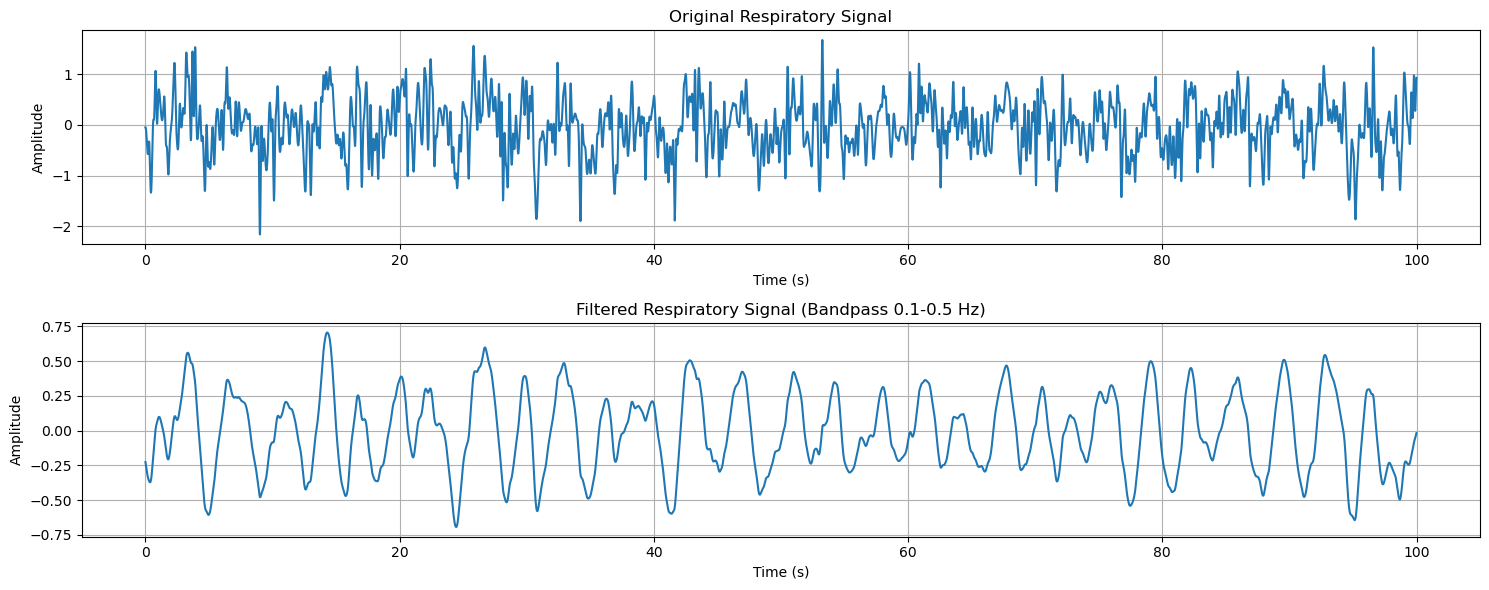

In [41]:
from scipy import signal
import neurokit2 as nk

resp_signal = nk.rsp_simulate(duration=100, sampling_rate=100, noise=0.83, random_state=160823, respiratory_rate=18)

cutoff_low = 0.1  # Hz
cutoff_high = 0.5  # Hz
order = 1

b, a = signal.butter(order, [cutoff_low, cutoff_high], btype='bandpass', fs=100)
filtered_resp_signal = signal.filtfilt(b, a, resp_signal)

# Create a time vector
time = np.arange(len(resp_signal)) / 100  

# Create subplots
plt.figure(figsize=(15, 6))

# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(time, resp_signal)
plt.title('Original Respiratory Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot filtered signal
plt.subplot(2, 1, 2)
plt.plot(time, filtered_resp_signal)
plt.title('Filtered Respiratory Signal (Bandpass 0.1-0.5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


### Penjelasan Intruksi 2

Pada intruksi ke-2 kita membuat sebuah signal respirasi (pernafasan) menggunakan paramater yang telah ditentukan, kemudian dilanjutkan dengan membuat filter signal bandpass menggunakan `signal.butter`. Saya menentukan Cutoff Low dan High berdasarkan beberapa langkah:
1. Langkah pertama kita menghitung frekuensi respirasi (Hz)\
    Diketahui:
    - 1 menit = 60 detik
    - Jumlah siklus respirasi dalam 1 menit = 18

    Maka, frekuensi respirasi (`fresp`) dapat dihitung sebagai:

    $
    f_{resp} = \frac{18}{60} = 0.3\ \text{Hz}
    $

    **Interpretasi:**

    Artinya, frekuensi utama sinyal respirasi berada di sekitar **0.3 Hz**.

2. Menentukan rentang frekuensi\
    Karena respirasi tidak hanya titik tunggal (karena variasi alami pernapasan), kita kasih sedikit lebar:

    Misalnya:
    - Bawah: 0.1 Hz
    - Atas: 0.5 Hz

    Jadi sinyal pernapasan akan dijaga antara 0.1–0.5 Hz.
    - 0.1 Hz: menghilangkan slow drift / baseline wander
    - 0.5 Hz: memotong noise frekuensi tinggi.

3. Kenapa Pemilihan Rentang Cutoff 0.1 – 0.5 Hz ?
    - `Fisiologi pernapasan manusia` berada di frekuensi 0.1 hingga 0.5 Hz:
        - 0.1 Hz = 6 siklus per menit (napas sangat lambat, seperti saat meditasi).
        - 0.5 Hz = 30 siklus per menit (napas cepat, seperti saat berolahraga ringan).
    - Respiratory Rate kita di nk.rsp_simulate di-set 18 breaths per minute, atau sekitar 0.3 Hz.
        Jadi, sinyal utama yang ingin ditangkap memang ada di rentang 0.1 - 0.5 Hz ini.
    - Tujuannya: menyaring sinyal supaya fokus hanya ke frekuensi yang berhubungan dengan napas, dan membuang noise di luar itu (seperti noise rendah <0.1 Hz akibat pergeseran baseline atau noise tinggi >0.5 Hz akibat aktivitas otot atau artefak alat).

4. Pemilihan order = 1 \
    Dipilih untuk menjaga bentuk asli sinyal napas agar tetap halus dan menghindari distorsi akibat karakteristik filter tajam dari order tinggi. Order yang lebih tinggi (>2) dalam sinyal ini terbukti menghasilkan instabilitas numerik dan artefak tidak diinginkan.

## Instruksi 3
3. Kamu sedang mencoba membuat filter audio sederhana, maka kamu mencoba untuk merekam suara audio menggunakan handphone / laptop dengan deskripsi berikut:
    - Anda harus berbicara selama 20 detik.
    - Bacaan / percakapan yang anda rekam haruslah berisi informasi mengenai diri anda, seperti nama, asal daerah, hobi, dll.
    - Lakukanlah perekaman di dekat sumber noise statis seperti kipas angin, AC, atau kipas laptop anda (atau apapun yang merupakan noise frekuensi tinggi)
    - Lakukanlah proses filtering pada audio tersebut dengan menggunakan bandpass. Temukan frekuensi cutoff untuk bandpass yang paling sesuai dengan karakteristik audio yang anda rekam.
    - Visualisasikan spektrum frekuensi menggunakan FFT dari audio sebelum di filter dan setelah di filter (dengan ketiga filter yang telah anda buat).

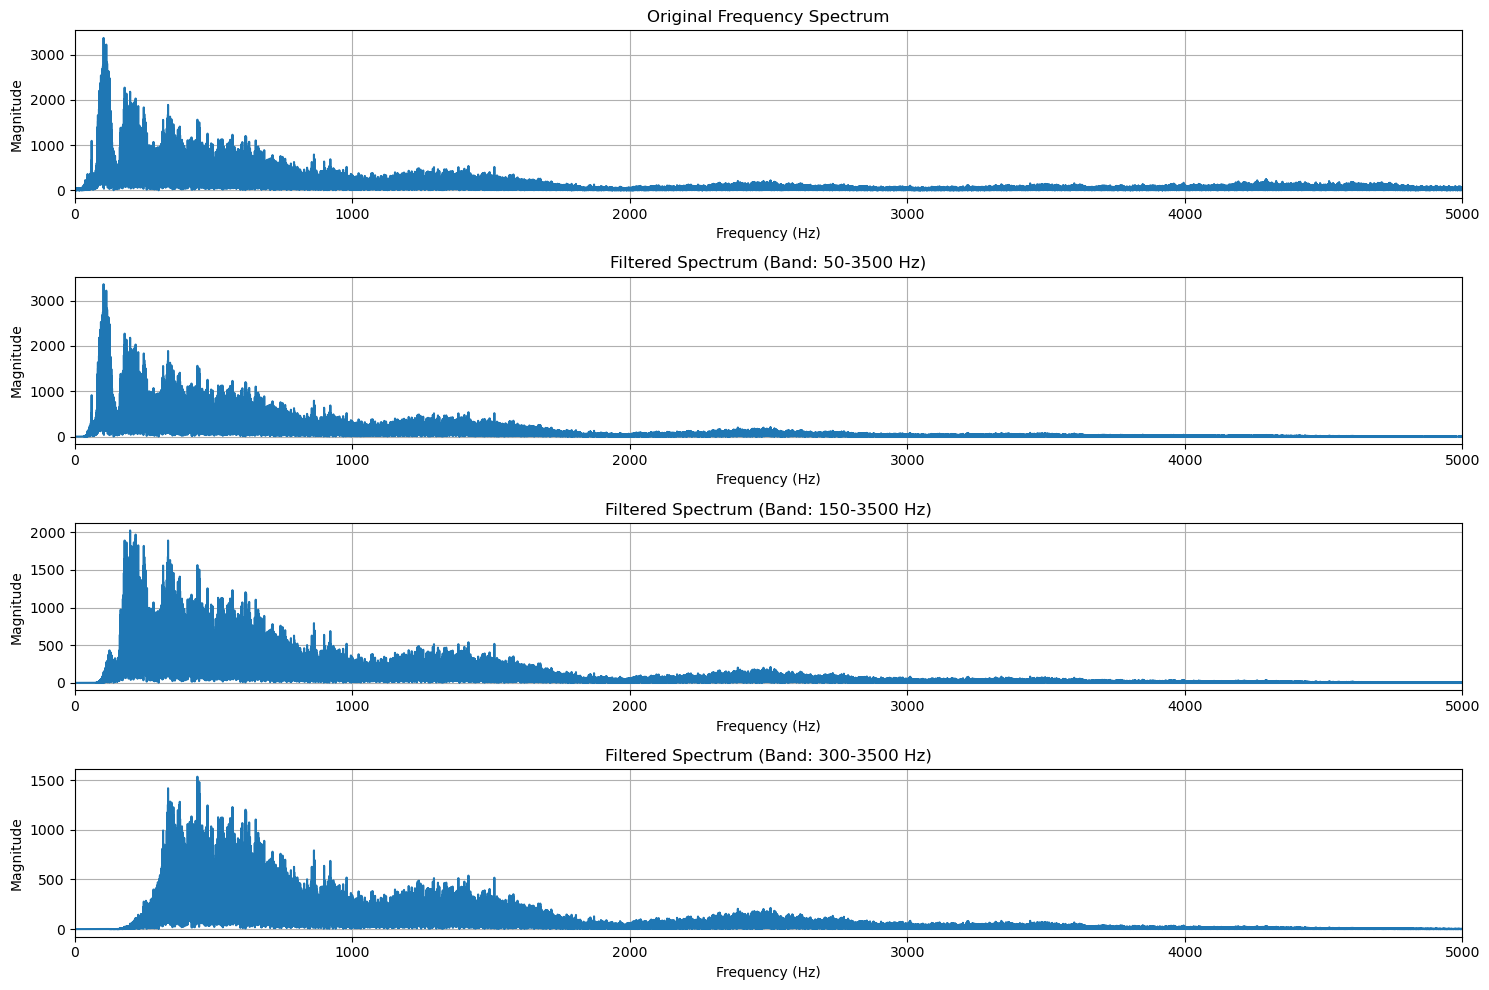

In [83]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Load audio file
sample_rate, audio = wavfile.read('rekamanarieffiks.wav')

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Normalize audio
audio = audio / np.max(np.abs(audio))

# Calculate FFT for original signal
n = len(audio)
freq = np.fft.rfftfreq(n, d=1/sample_rate)
fft_audio = np.abs(np.fft.rfft(audio))

# Define three different bandpass filters
filters = [

    {'lowcut': 50, 'highcut': 3500, 'order': 4},   
    {'lowcut': 150, 'highcut': 3500, 'order': 4},  
    {'lowcut': 300, 'highcut': 3500, 'order': 4}   
]

# Create subplots
plt.figure(figsize=(15, 10))

# Plot original frequency spectrum
plt.subplot(4, 1, 1)
plt.plot(freq, fft_audio)
plt.title('Original Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 5000)  # Limit x-axis for better visualization

# Apply and plot each filter
for i, filt in enumerate(filters, 1):
    # Create and apply bandpass filter
    nyq = 0.5 * sample_rate
    low = filt['lowcut'] / nyq
    high = filt['highcut'] / nyq
    b, a = signal.butter(filt['order'], [low, high], btype='band')
    filtered_audio = signal.filtfilt(b, a, audio)
    
    # Calculate FFT for filtered signal
    fft_filtered = np.abs(np.fft.rfft(filtered_audio))
    
    # Plot filtered frequency spectrum
    plt.subplot(4, 1, i+1)
    plt.plot(freq, fft_filtered)
    plt.title(f'Filtered Spectrum (Band: {filt["lowcut"]}-{filt["highcut"]} Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(0, 5000)  # Limit x-axis for better visualization

plt.tight_layout()
plt.show()

# Save all three filtered audio versions
for i, filt in enumerate(filters):
    wavfile.write(f'filtered_audio_{filt["lowcut"]}-{filt["highcut"]}Hz.wav', 
                 sample_rate, 
                 (filtered_audio * 32767).astype(np.int16))


### Penjelasan Instruksi 3
Pada Kesempatan ini saya membuat audio selama 20 menit kemudian file audio di convert menjadi WAV dengan channel Mono dan Sample-rate 44.1 Khz.
Bisa dilihat pada visualisasi Spektrum 1 yang menggambarkan audio yang saya buat.
Berikut saya sampaikan analisis terkait hasilnya:

| Bandpass       | Analisis                                                                 |
|----------------|--------------------------------------------------------------------------|
| 50–3500 Hz     | Noise kipas dan hum masih ada (karena cutoff rendah 50 Hz), meski suara penuh |
| 150–3500 Hz    | Noise rendah dibuang, suara tetap penuh dan jernih (ideal)                |
| 300–3500 Hz    | Noise rendah hilang total, tapi suara jadi terlalu tipis (chest voice hilang) |

Hasil audio yang telah difilter, berhasil menghilangkan sebagian besar noise dari audio tersebut, namun masih tetap ada suara desikan dalam audio tersebut


### Coba Secara Brute Force
https://chatgpt.com/share/680dbc55-9e4c-800a-8191-54f7a79e211e

Best Filter: 50-4000 Hz with energy 13383.08


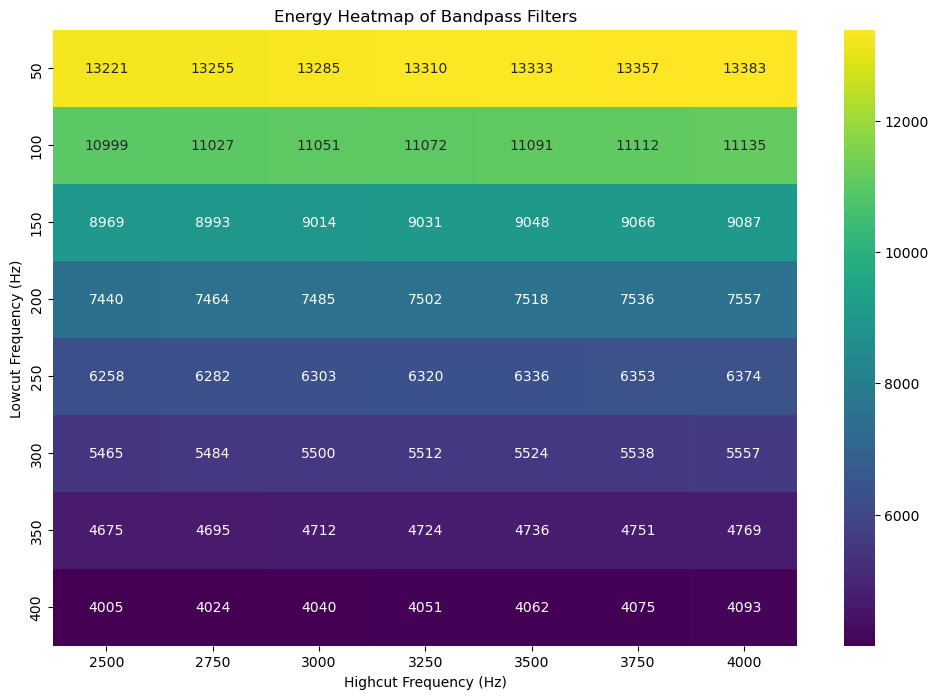

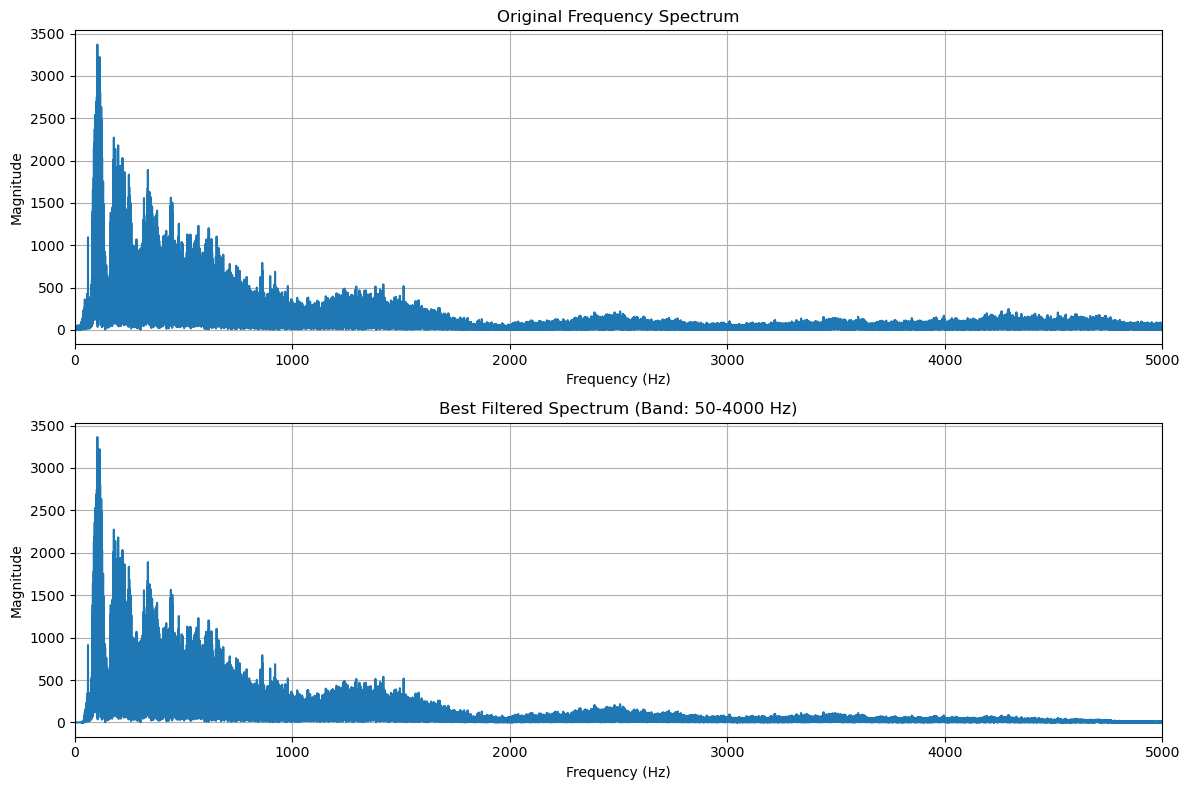


Top 10 Filter Settings:
    Lowcut  Highcut        Energy
6       50     4000  13383.078182
5       50     3750  13356.893839
4       50     3500  13333.102009
3       50     3250  13309.945240
2       50     3000  13284.944138
1       50     2750  13255.498778
0       50     2500  13221.044720
13     100     4000  11134.932112
12     100     3750  11111.535776
11     100     3500  11091.072214


In [81]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load audio file
sample_rate, audio = wavfile.read('rekamanarieffiks.wav')

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Normalize audio
audio = audio / np.max(np.abs(audio))

# FFT original
n = len(audio)
freq = np.fft.rfftfreq(n, d=1/sample_rate)
fft_audio = np.abs(np.fft.rfft(audio))

# Define search range
lowcut_range = np.arange(50, 401, 50)    # 50Hz to 400Hz step 50
highcut_range = np.arange(2500, 4001, 250) # 2500Hz to 4000Hz step 250

results = []
energy_map = np.zeros((len(lowcut_range), len(highcut_range)))

# Bruteforce loop
for i, lowcut in enumerate(lowcut_range):
    for j, highcut in enumerate(highcut_range):
        if highcut > lowcut + 500:
            nyq = 0.5 * sample_rate
            low = lowcut / nyq
            high = highcut / nyq
            b, a = signal.butter(4, [low, high], btype='band')
            filtered_audio = signal.filtfilt(b, a, audio)

            energy = np.sum(filtered_audio ** 2)
            energy_map[i, j] = energy

            results.append({
                'Lowcut': lowcut,
                'Highcut': highcut,
                'Energy': energy
            })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Find best filter
best_row = results_df.loc[results_df['Energy'].idxmax()]
print(f"Best Filter: {int(best_row['Lowcut'])}-{int(best_row['Highcut'])} Hz with energy {best_row['Energy']:.2f}")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(energy_map, xticklabels=highcut_range, yticklabels=lowcut_range, cmap='viridis', annot=True, fmt=".0f")
plt.title('Energy Heatmap of Bandpass Filters')
plt.xlabel('Highcut Frequency (Hz)')
plt.ylabel('Lowcut Frequency (Hz)')
plt.show()

# Plot result
best_lowcut = best_row['Lowcut']
best_highcut = best_row['Highcut']

nyq = 0.5 * sample_rate
low = best_lowcut / nyq
high = best_highcut / nyq
b, a = signal.butter(4, [low, high], btype='band')
best_filtered_audio = signal.filtfilt(b, a, audio)

fft_filtered_best = np.abs(np.fft.rfft(best_filtered_audio))

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(freq, fft_audio)
plt.title('Original Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 5000)

plt.subplot(2,1,2)
plt.plot(freq, fft_filtered_best)
plt.title(f'Best Filtered Spectrum (Band: {int(best_lowcut)}-{int(best_highcut)} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 5000)

plt.tight_layout()
plt.show()

# Save best filtered audio
wavfile.write(f'filtered_audio_best_{int(best_lowcut)}-{int(best_highcut)}Hz.wav', 
              sample_rate, 
              (best_filtered_audio * 32767).astype(np.int16))

# Show top 10 best filters
top10 = results_df.sort_values(by='Energy', ascending=False).head(10)
print("\nTop 10 Filter Settings:")
print(top10)

## REFERENSI

1. [Bukti Percakapan dengan AI](https://chatgpt.com/share/680dbd90-0ce8-8000-9033-3ef21afb7816)
2. [Simulasi Aliansing](https://www.youtube.com/watch?v=CTllCx5pHvM)
3. [Penggunaan Copilot](https://drive.google.com/drive/folders/1rCSmlkAud1uPcgJi-lkyrpwkXmBJGKnc?usp=sharing)
4. [Modul Hands-on 2](https://github.com/informatika-itera/if3024-handson/blob/main/2025-notebooks/4_hands-on2.ipynb)
